### **Exploratory Data Analysis (EDA) on Dune Sales Dataset**

### Introduction
This notebook performs an Exploratory Data Analysis (EDA) on the Dune Sales dataset.

### Step 1: Load the Data

In [1]:
# Import Libraries
import pandas as pd # Data Preprocessing
import numpy as np # Data Preprocessing
import matplotlib.pyplot as plt # Data Visualisation
import seaborn as sns # Data Visualisation
import missingno as msno # Missing Data - Data Visualisation
from collections import Counter # Counting
import warnings
warnings.filterwarnings('ignore') 

In [2]:
# Load dataset
file_path = 'Dune_Sales_Data.csv'
df = pd.read_csv(file_path)

### Step 2: Data Understanding

In [3]:
# Display the first few rows of the dataset to understand its structure
df.head()

,Date,Customer,Sales Person,Customer_Age,Customer_Gender,State,Product_Category,Sub_Category,Payment Option,Quantity,Unit_Cost,Unit_Price
0,19-Feb-16,High,Segun,29,F,Abia,Accessories,Keyboard,Online,1.0,80.00,109.00
1,20-Feb-16,High,Segun,29,F,Abia,Clothing,Polo shirts,Online,2.0,24.50,28.50
2,27-Feb-16,High,Segun,29,F,Abia,Accessories,Keyboard,Online,3.0,3.67,5.00
3,12-Mar-16,High,Segun,29,F,Abia,Accessories,Keyboard,Online,2.0,87.50,116.50
4,12-Mar-16,High,Segun,29,F,Abia,Accessories,Keyboard,Online,3.0,35.00,41.67


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34867 entries, 0 to 34866
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              34866 non-null  object 
 1   Customer          34866 non-null  object 
 2   Sales Person      34866 non-null  object 
 3   Customer_Age      34867 non-null  int64  
 4   Customer_Gender   34866 non-null  object 
 5   State             34866 non-null  object 
 6   Product_Category  34866 non-null  object 
 7   Sub_Category      34866 non-null  object 
 8   Payment Option    34866 non-null  object 
 9   Quantity          34866 non-null  float64
 10  Unit_Cost         34866 non-null  float64
 11  Unit_Price        34866 non-null  float64
dtypes: float64(3), int64(1), object(8)
memory usage: 3.2+ MB


In [5]:
df.columns, df.shape

(Index(['Date', 'Customer', 'Sales Person', 'Customer_Age', 'Customer_Gender',
        'State', 'Product_Category', 'Sub_Category', 'Payment Option',
        'Quantity', 'Unit_Cost', 'Unit_Price'],
       dtype='object'),
 (34867, 12))

### Step 3: Data Cleaning

In [6]:
# Check for missing values in the dataset
df.isnull().sum()

Date                1
Customer            1
Sales Person        1
Customer_Age        0
Customer_Gender     1
State               1
Product_Category    1
Sub_Category        1
Payment Option      1
Quantity            1
Unit_Cost           1
Unit_Price          1
dtype: int64

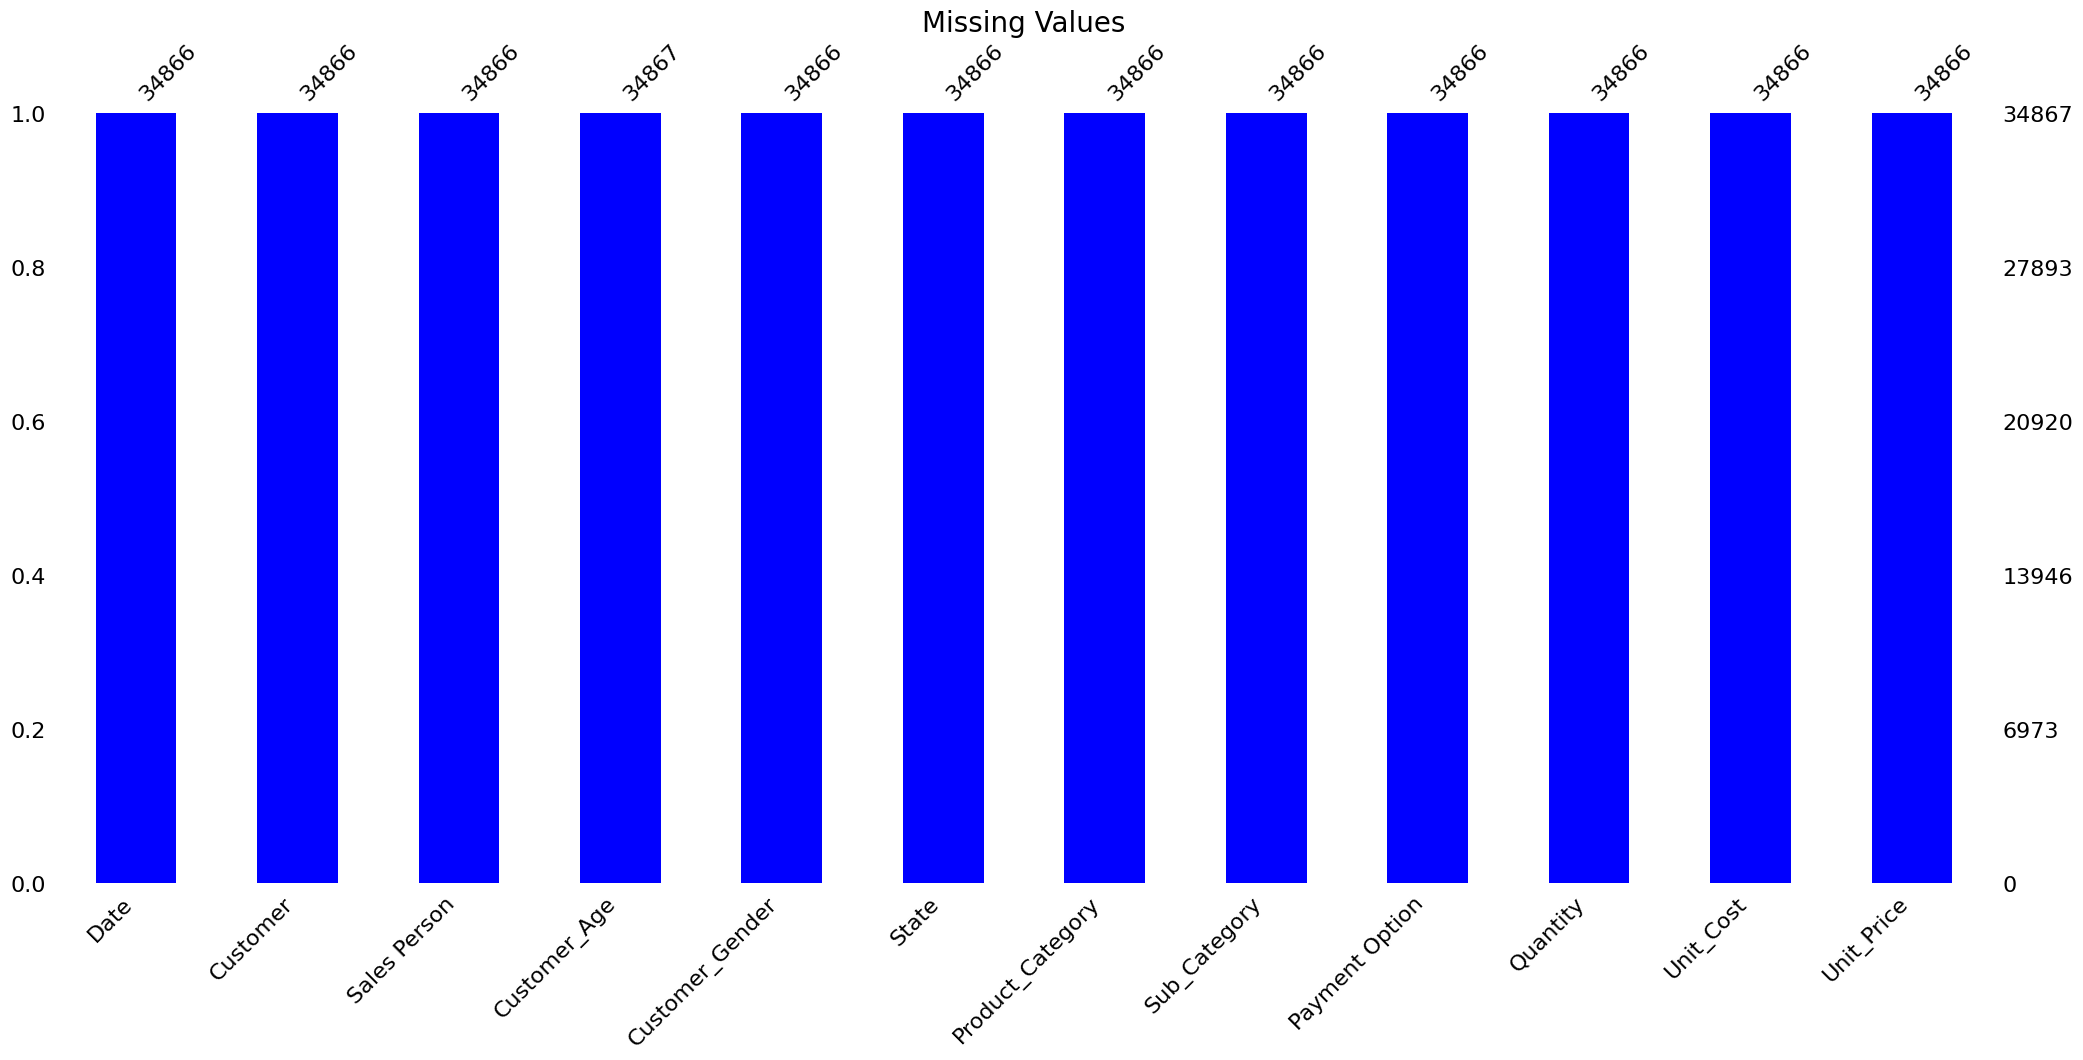

In [7]:
# visualise missing data
msno.bar(df, color='blue').set_title('Missing Values', fontsize=20);

In [8]:
# View row with missing values
row_with_missing_data = df[df.isna().any(axis=1)]
row_with_missing_data

,Date,Customer,Sales Person,Customer_Age,Customer_Gender,State,Product_Category,Sub_Category,Payment Option,Quantity,Unit_Cost,Unit_Price
34866,NaN,NaN,NaN,38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# Drop rows with any missing data
df = df.dropna() # drop missing data

In [10]:
df.head()

,Date,Customer,Sales Person,Customer_Age,Customer_Gender,State,Product_Category,Sub_Category,Payment Option,Quantity,Unit_Cost,Unit_Price
0,19-Feb-16,High,Segun,29,F,Abia,Accessories,Keyboard,Online,1.0,80.00,109.00
1,20-Feb-16,High,Segun,29,F,Abia,Clothing,Polo shirts,Online,2.0,24.50,28.50
2,27-Feb-16,High,Segun,29,F,Abia,Accessories,Keyboard,Online,3.0,3.67,5.00
3,12-Mar-16,High,Segun,29,F,Abia,Accessories,Keyboard,Online,2.0,87.50,116.50
4,12-Mar-16,High,Segun,29,F,Abia,Accessories,Keyboard,Online,3.0,35.00,41.67


In [11]:
# Verify that missing values have been handled
df.isnull().any()

Date                False
Customer            False
Sales Person        False
Customer_Age        False
Customer_Gender     False
State               False
Product_Category    False
Sub_Category        False
Payment Option      False
Quantity            False
Unit_Cost           False
Unit_Price          False
dtype: bool

### Step 4: Feature Engineering

In [12]:
# Datetime analysis - convert date column into pandas datetime object
df['Date'] = pd.to_datetime(df['Date'])

# extract month, month name, quarter and year
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Month_Name'] = df['Date'].dt.month_name()
df['Quarter'] = df['Date'].dt.quarter

df.head(2)

,Date,Customer,Sales Person,Customer_Age,Customer_Gender,State,Product_Category,Sub_Category,Payment Option,Quantity,Unit_Cost,Unit_Price,Year,Month,Month_Name,Quarter
0,2016-02-19,High,Segun,29,F,Abia,Accessories,Keyboard,Online,1.0,80.0,109.0,2016,2,February,1
1,2016-02-20,High,Segun,29,F,Abia,Clothing,Polo shirts,Online,2.0,24.5,28.5,2016,2,February,1


In [13]:
# Group customer age using function
def age_group (x):
    if 0 < x <= 31:
        return '17 - 31 Young Adults'
    elif 32 <= x <= 45:
        return '32 - 45 Adults'
    elif 46 <= x <= 59:
        return '46 - 59 Old Adults'
    elif x > 59:
        return '>59 Elders'
    else:
        return 'Invalid Age Range'

# Apply age function to data
df['Age_Group'] = df['Customer_Age'].apply(age_group)

df.head(2)

,Date,Customer,Sales Person,Customer_Age,Customer_Gender,State,Product_Category,Sub_Category,Payment Option,Quantity,Unit_Cost,Unit_Price,Year,Month,Month_Name,Quarter,Age_Group
0,2016-02-19,High,Segun,29,F,Abia,Accessories,Keyboard,Online,1.0,80.0,109.0,2016,2,February,1,17 - 31 Young Adults
1,2016-02-20,High,Segun,29,F,Abia,Clothing,Polo shirts,Online,2.0,24.5,28.5,2016,2,February,1,17 - 31 Young Adults


In [14]:
# Calculate cost, revenue and profit
df['Cost'] = df['Quantity'] * df['Unit_Cost']
df['Revenue'] = df['Quantity'] * df['Unit_Price']
df['Profit'] = df['Revenue'] - df['Cost']

df.head(2)

,Date,Customer,Sales Person,Customer_Age,Customer_Gender,State,Product_Category,Sub_Category,Payment Option,Quantity,Unit_Cost,Unit_Price,Year,Month,Month_Name,Quarter,Age_Group,Cost,Revenue,Profit
0,2016-02-19,High,Segun,29,F,Abia,Accessories,Keyboard,Online,1.0,80.0,109.0,2016,2,February,1,17 - 31 Young Adults,80.0,109.0,29.0
1,2016-02-20,High,Segun,29,F,Abia,Clothing,Polo shirts,Online,2.0,24.5,28.5,2016,2,February,1,17 - 31 Young Adults,49.0,57.0,8.0


In [15]:
# Calculate Profit and Loss Grouping Function
def profit_loss(x):
    if x < 0:
        return 'Loss'
    elif x > 0:
        return 'Profit'
    else:
        return 'Even'

# Apply Profit and Loss Grouping Function to Data
df['Profit_Loss'] = df['Profit'].apply(profit_loss)

df.head(2)

,Date,Customer,Sales Person,Customer_Age,Customer_Gender,State,Product_Category,Sub_Category,Payment Option,Quantity,...,Unit_Price,Year,Month,Month_Name,Quarter,Age_Group,Cost,Revenue,Profit,Profit_Loss
0,2016-02-19,High,Segun,29,F,Abia,Accessories,Keyboard,Online,1.0,...,109.0,2016,2,February,1,17 - 31 Young Adults,80.0,109.0,29.0,Profit
1,2016-02-20,High,Segun,29,F,Abia,Clothing,Polo shirts,Online,2.0,...,28.5,2016,2,February,1,17 - 31 Young Adults,49.0,57.0,8.0,Profit


### Step 5: Data Exploration

In [16]:
# Summary statistics of the dataset
df.describe() # numerical

,Date,Customer_Age,Quantity,Unit_Cost,Unit_Price,Year,Month,Quarter,Cost,Revenue,Profit
count,34866,34866.000000,34866.000000,34866.000000,34866.000000,34866.000000,34866.000000,34866.000000,34866.000000,34866.000000,34866.000000
mean,2016-01-19 18:35:05.110996224,36.382636,2.002524,349.880567,389.232473,2015.569237,6.317845,2.424052,576.004303,640.870037,64.865734
min,2015-01-01 00:00:00,17.000000,1.000000,0.670000,0.670000,2015.000000,1.000000,1.000000,2.000000,2.000000,-937.000000
25%,2015-10-26 00:00:00,28.000000,1.000000,45.000000,53.670000,2015.000000,3.000000,1.000000,85.000000,102.000000,5.010000
50%,2016-01-28 00:00:00,35.000000,2.000000,150.000000,179.000000,2016.000000,6.000000,2.000000,261.000000,318.990000,27.000000
75%,2016-04-26 00:00:00,44.000000,3.000000,455.000000,521.000000,2016.000000,9.000000,3.000000,769.000000,902.010000,96.000000
max,2016-07-31 00:00:00,87.000000,3.000000,3240.000000,5082.000000,2016.000000,12.000000,4.000000,3600.000000,5082.000000,1842.000000
std,NaN,11.112969,0.813936,490.015846,525.319097,0.495190,3.465317,1.114747,690.500055,736.650609,152.879946


In [17]:
df.describe(include=['object', 'bool']) # categorical

,Customer,Sales Person,Customer_Gender,State,Product_Category,Sub_Category,Payment Option,Month_Name,Age_Group,Profit_Loss
count,34866,34866,34866,34866,34866,34866,34866,34866,34866,34866
unique,4,7,2,36,3,17,3,12,4,3
top,Low,Remota,F,Lagos,Accessories,Keyboard,Cash,June,32 - 45 Adults,Profit
freq,13041,6667,17439,10332,22534,11112,15911,3680,14441,29592


#### Univariate Analysis - Categorical Variables

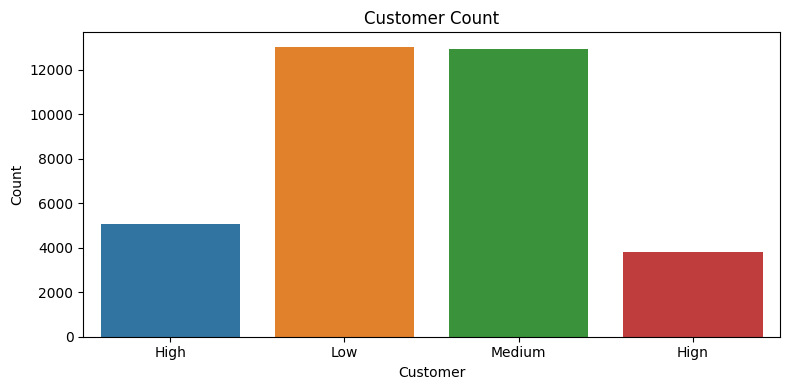

In [18]:
# Univariate Analysis - visualise columns to see customer specs
plt.figure(figsize=(8, 4))

sns.countplot(x='Customer', data=df)
plt.xlabel('Customer')
plt.ylabel('Count')
plt.title('Customer Count')

# show plot
plt.tight_layout()
plt.show()

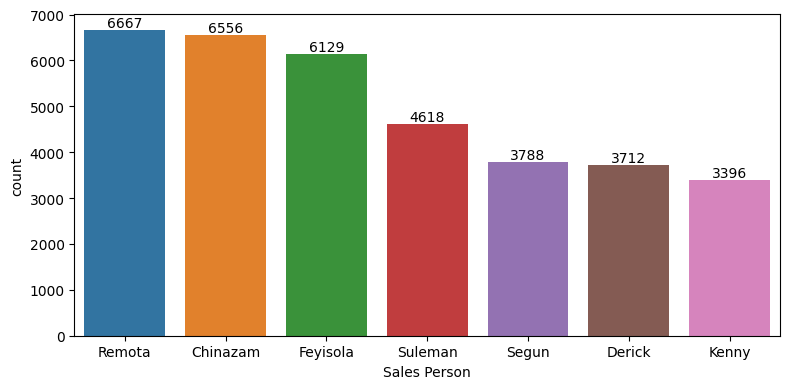

In [19]:
# visualise the sales person column using a column chart
plt.figure(figsize=(8, 4))
ax = sns.countplot(x='Sales Person', data=df, order=df['Sales Person'].value_counts().index)
ax.bar_label(ax.containers[0])

# Display the plot
plt.tight_layout()
plt.show()

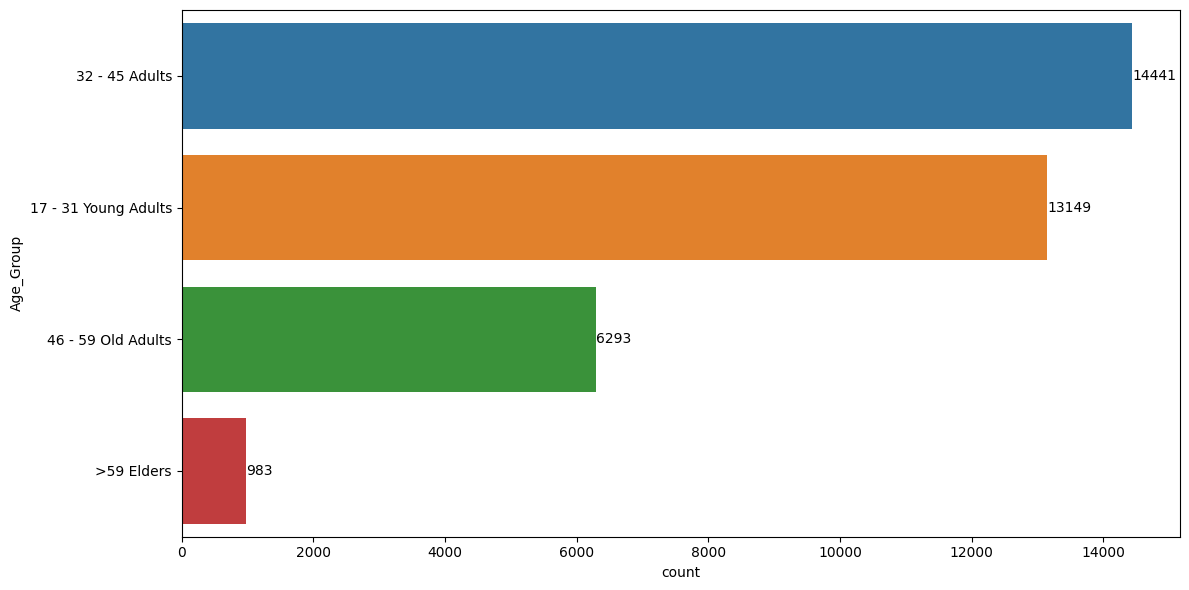

In [20]:
# visualise the age group using a bar chart
plt.figure(figsize=(12,6))

ax = sns.countplot(y=df['Age_Group'], order=df['Age_Group'].value_counts(ascending=False).index)
ax.bar_label(ax.containers[0])
# Display the plot
plt.tight_layout()
plt.show()

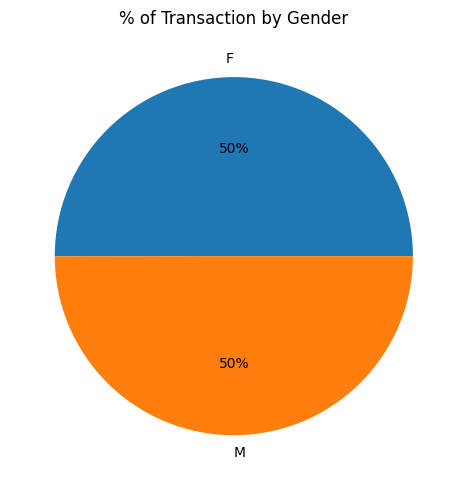

In [21]:
count_cust = df['Customer_Gender'].value_counts()

plt.figure(figsize=(5,5))

plt.pie(count_cust, labels=count_cust.index, autopct=lambda p:f'{p:.0f}%')
plt.title('% of Transaction by Gender')

# Display the plot
plt.tight_layout()
plt.show()       

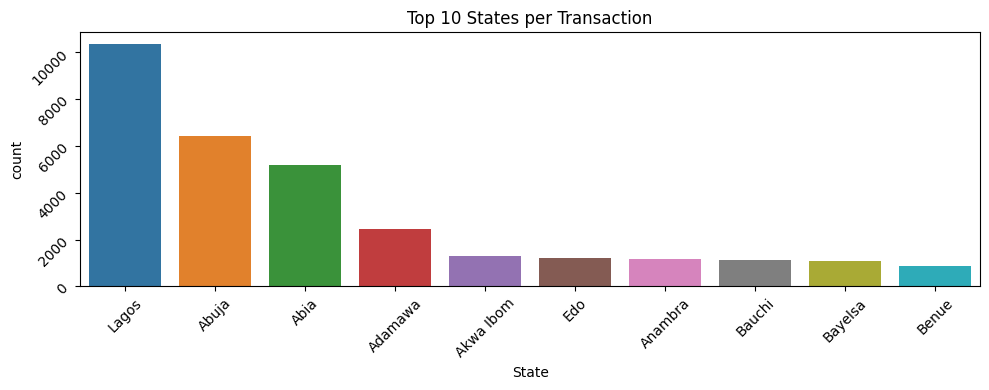

In [22]:
# top 10 states per transaction
topten = df['State'].value_counts().head(10)

plt.figure(figsize=(10,4))

sns.countplot(x='State', data=df, order=topten.index)
plt.title('Top 10 States per Transaction')
# rotate axis text
plt.xticks(rotation=45)
plt.yticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show() 

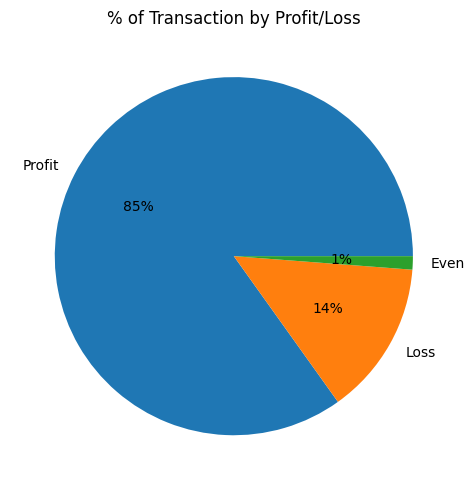

In [23]:
# count total value of column
count = Counter(df['Profit_Loss'])
# set fig size
plt.figure(figsize=(5,5))
# define plot
plt.pie(count.values(), labels=count.keys(), autopct=lambda p:f'{p:.0f}%')
plt.title('% of Transaction by Profit/Loss')
# Display the plot
plt.tight_layout()
plt.show() 

#### Univariate Analysis - Numerical variables

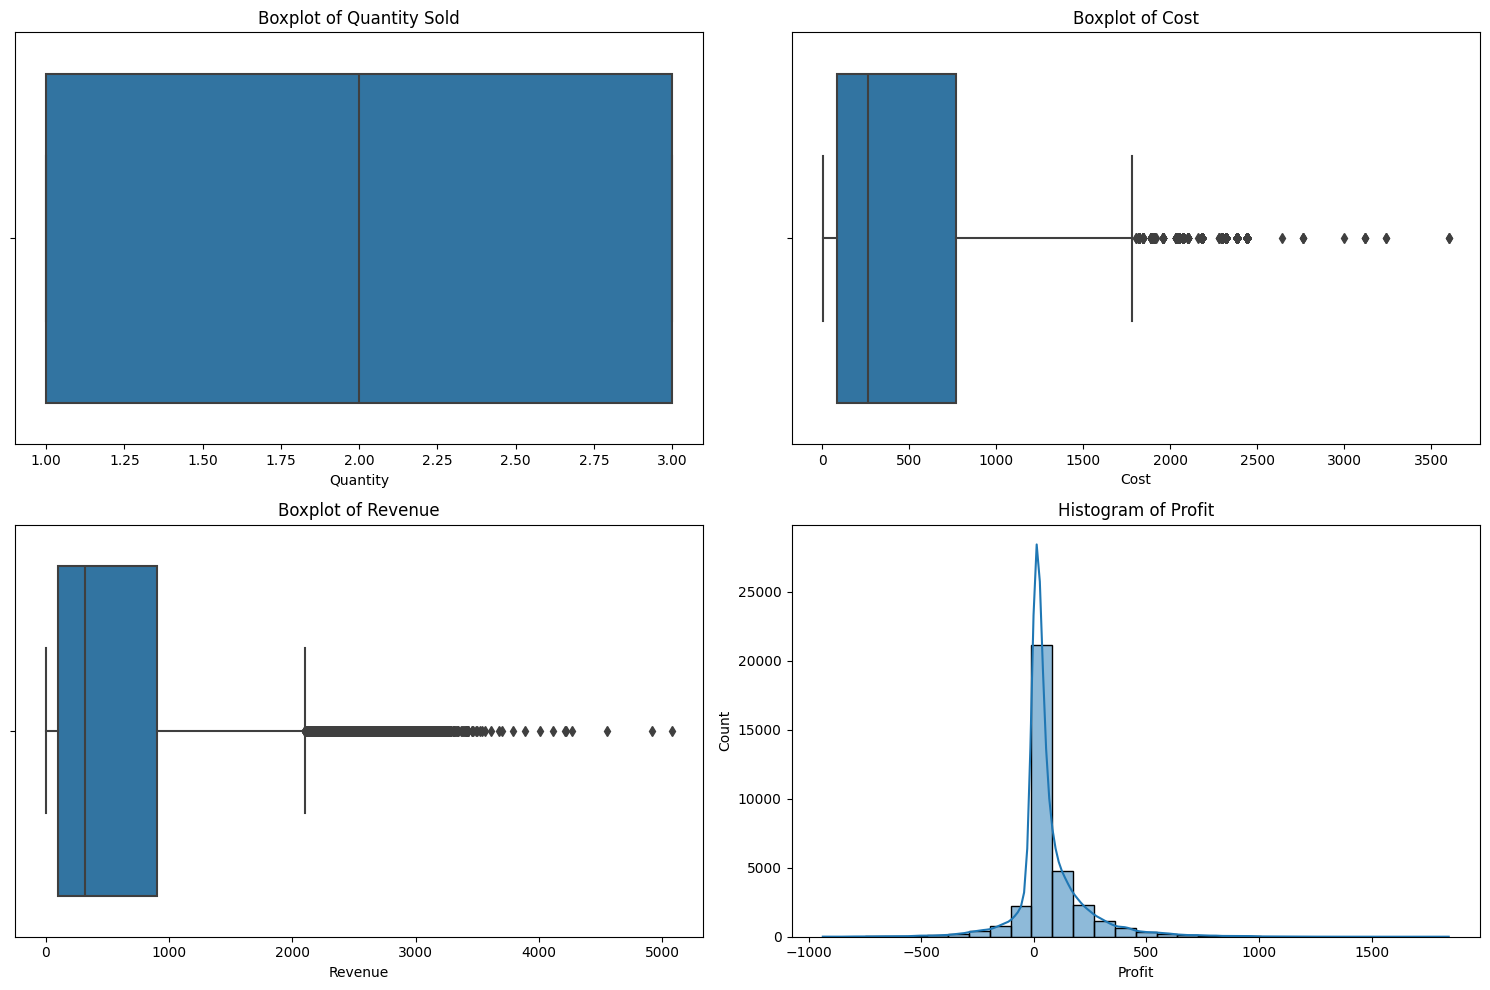

In [24]:
# Quantity, Cost, Revenue and Profit
# using subplots
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15,10))
# visualise
sns.boxplot(x='Quantity', data=df, ax=axs[0,0]).set_title('Boxplot of Quantity Sold')
sns.boxplot(x='Cost', data=df, ax=axs[0,1]).set_title('Boxplot of Cost')
sns.boxplot(x='Revenue', data=df, ax=axs[1,0]).set_title('Boxplot of Revenue')
sns.histplot(x='Profit', data=df, ax=axs[1,1], kde=True, bins=30).set_title('Histogram of Profit');
# Display the plot
plt.tight_layout()
plt.show() 

#### Bivariate Analysis - Categorical Data
##### Analysing relationships between two variables (a dependent variable against an independent variable)

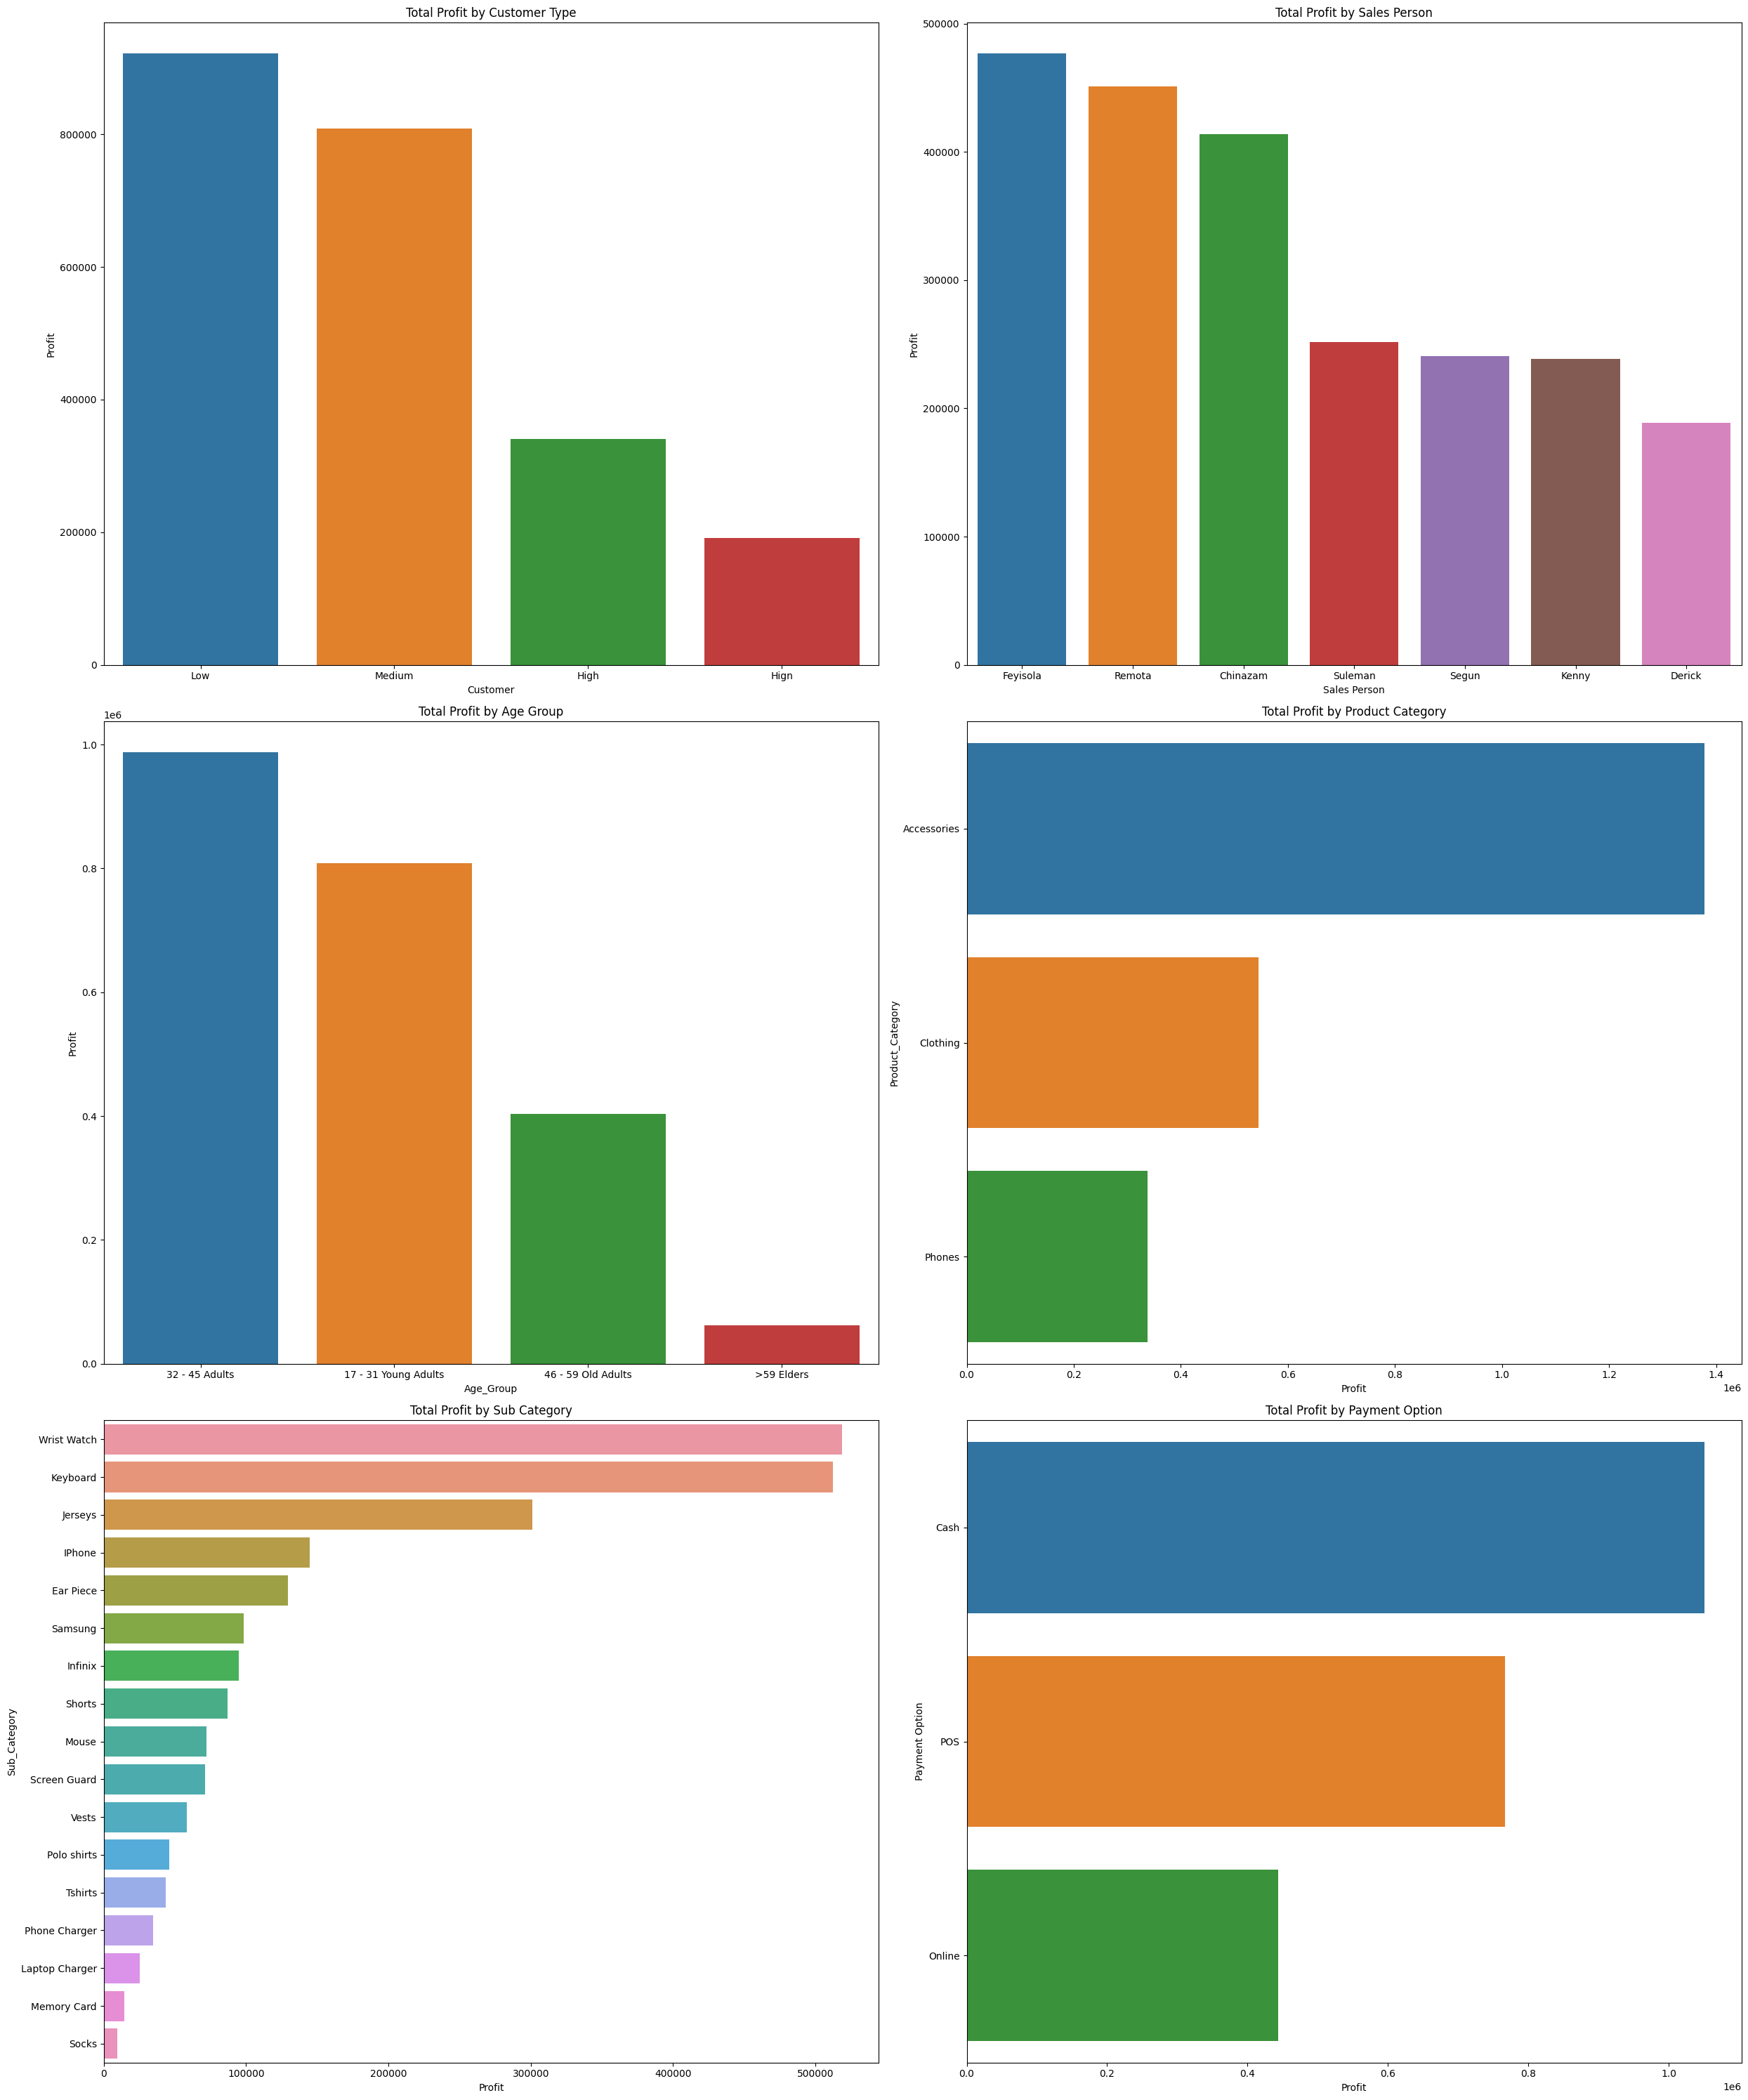

In [25]:
# define figure and axis subplots
fig, axs = plt.subplots(3,2, figsize=(25,30))

# calculate profit by customer lookup
cust_profit = df.groupby('Customer')['Profit'].sum().reset_index().sort_values(by='Profit', ascending=False)
sp_profit = df.groupby('Sales Person')['Profit'].sum().reset_index().sort_values(by='Profit', ascending=False)
ag_profit = df.groupby('Age_Group')['Profit'].sum().reset_index().sort_values(by='Profit', ascending=False)
pc_profit = df.groupby('Product_Category')['Profit'].sum().reset_index().sort_values(by='Profit', ascending=False)
sc_profit = df.groupby('Sub_Category')['Profit'].sum().reset_index().sort_values(by='Profit', ascending=False)
po_profit = df.groupby('Payment Option')['Profit'].sum().reset_index().sort_values(by='Profit', ascending=False)

# plot visuals (barplot[x, y, data, axis]) axis one
sns.barplot(x='Customer', y='Profit', data=cust_profit, ax=axs[0,0]).set_title('Total Profit by Customer Type')
# plot visuals (barplot[x, y, data, axis]) axis two
sns.barplot(x='Sales Person', y='Profit', data=sp_profit, ax=axs[0,1]).set_title('Total Profit by Sales Person')
# plot visuals (barplot[x, y, data, axis]) axis three
sns.barplot(x='Age_Group', y='Profit', data=ag_profit, ax=axs[1,0]).set_title('Total Profit by Age Group')
# plot visuals (barplot[x, y, data, axis]) axis four
sns.barplot(y='Product_Category', x='Profit', data=pc_profit, ax=axs[1,1]).set_title('Total Profit by Product Category')
# plot visuals (barplot[x, y, data, axis]) axis five
sns.barplot(y='Sub_Category', x='Profit', data=sc_profit, ax=axs[2,0]).set_title('Total Profit by Sub Category')
# plot visuals (barplot[x, y, data, axis]) axis six
sns.barplot(y='Payment Option', x='Profit', data=po_profit, ax=axs[2,1]).set_title('Total Profit by Payment Option')

# Display the plot
plt.tight_layout()
plt.show() 

#### Numerical Data

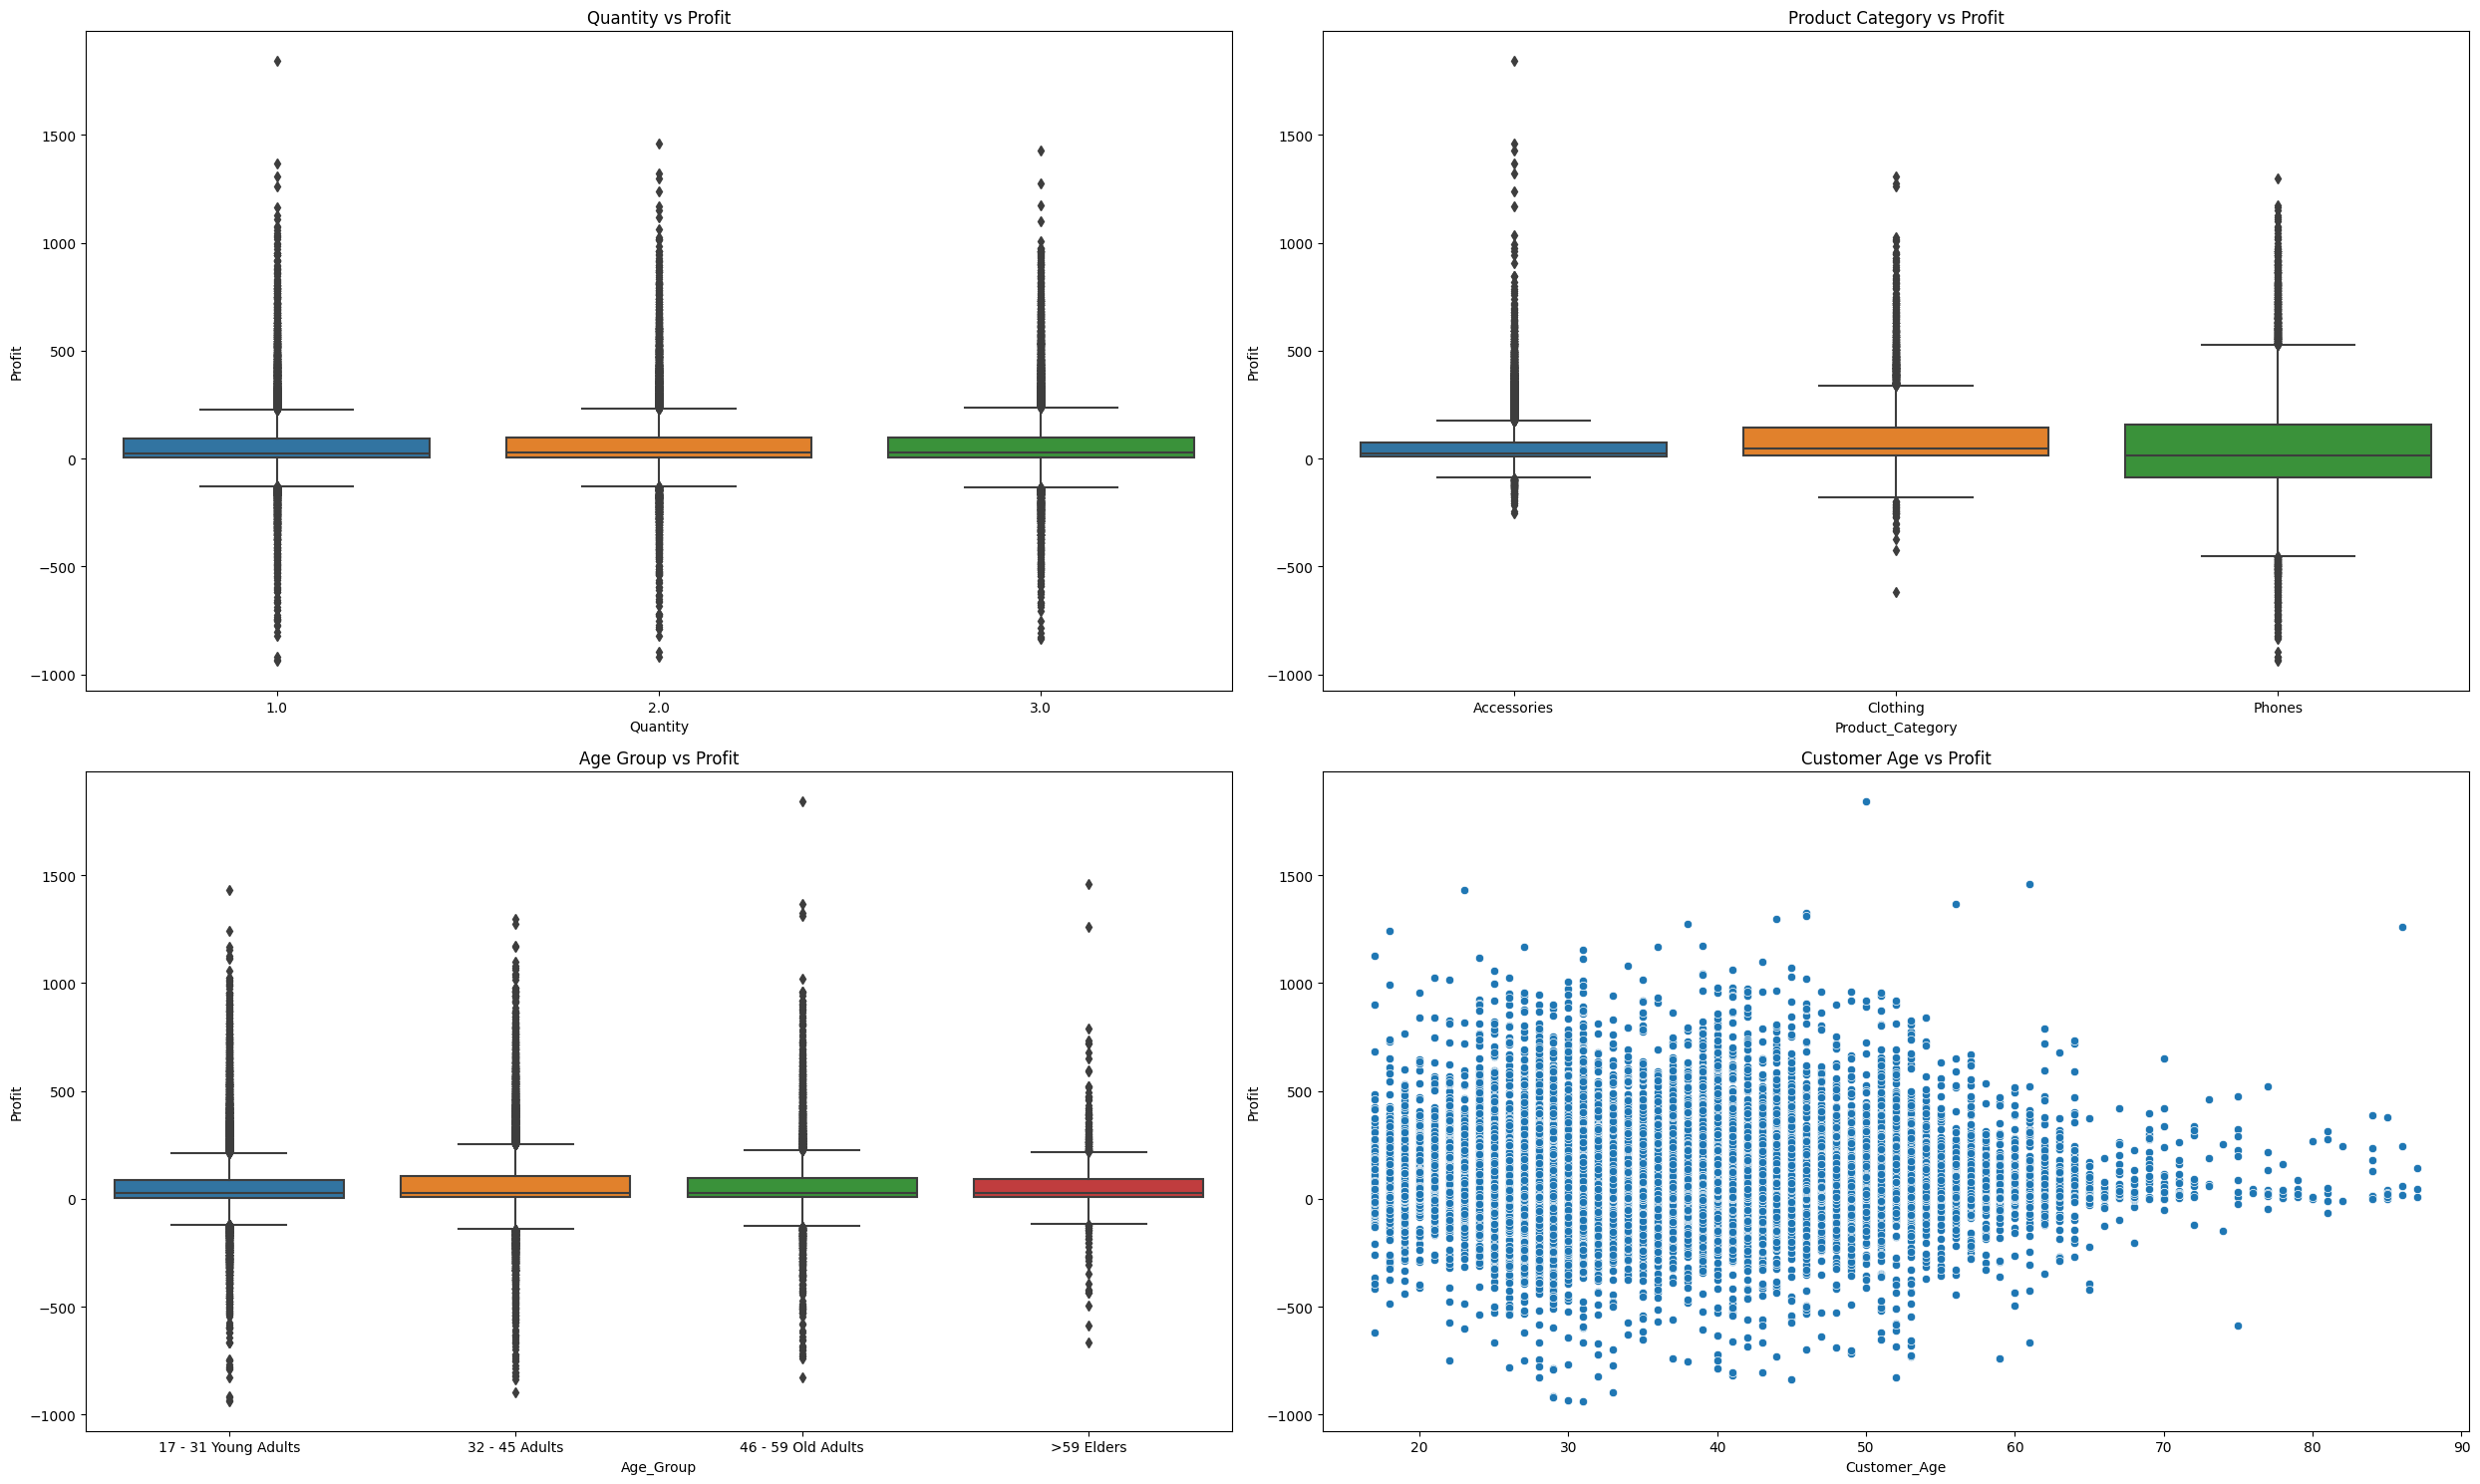

In [26]:
# define figure and axis for subplots plt.subplots(number of rows, number of column, figsize)
fig, axs = plt.subplots(2, 2, figsize=(25,15))

# plot visuals using boxplots(x, y, data, axis) and scatterplot(x, y, data, axis)
sns.boxplot(x='Quantity', y='Profit', data=df, ax=axs[0,0]).set_title('Quantity vs Profit')
# plot visuals using boxplots(x, y, data, axis) and scatterplot(x, y, data, axis)
sns.boxplot(x='Product_Category', y='Profit', data=df, ax=axs[0,1]).set_title('Product Category vs Profit')
# plot visuals using boxplots(x, y, data, axis) and scatterplot(x, y, data, axis)
sns.boxplot(x='Age_Group', y='Profit', data=df, ax=axs[1,0]).set_title('Age Group vs Profit')
# plot visuals using scatterplot(x, y, data, axis) and scatterplot(x, y, data, axis)
sns.scatterplot(x='Customer_Age', y='Profit', data=df, ax=axs[1,1]).set_title('Customer Age vs Profit')

# Display the plot
plt.tight_layout()
plt.show() 

#### Multivariate Analysis
##### Analysing relationships between three or more variables (a dependent variable against two or more variables)

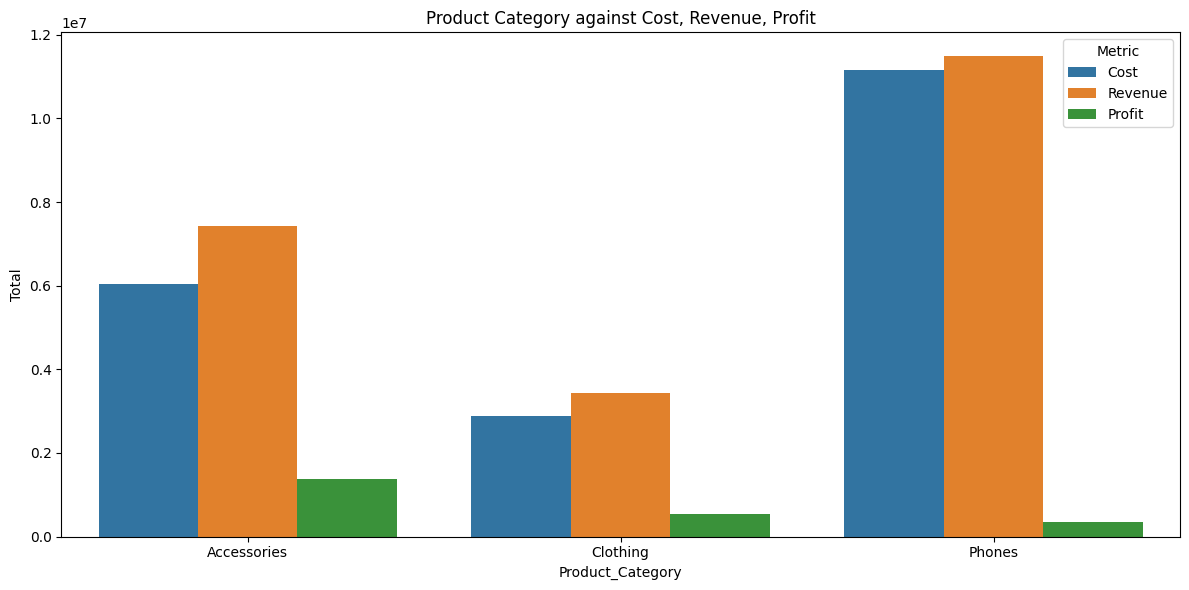

In [27]:
plt.figure(figsize=(12,6))
# Product Category against Cost, Revenue, Profit
pc_crp = df.groupby('Product_Category')[['Cost', 'Revenue', 'Profit']].sum().reset_index()
# Reshape df variables with one role for each column
procat = pd.melt(pc_crp, id_vars='Product_Category', var_name='Metric', value_name='Total')
# Visualise 
sns.barplot(x='Product_Category', y='Total', hue='Metric', data=procat).set_title('Product Category against Cost, Revenue, Profit');
# Display the plot
plt.tight_layout()
plt.show() 

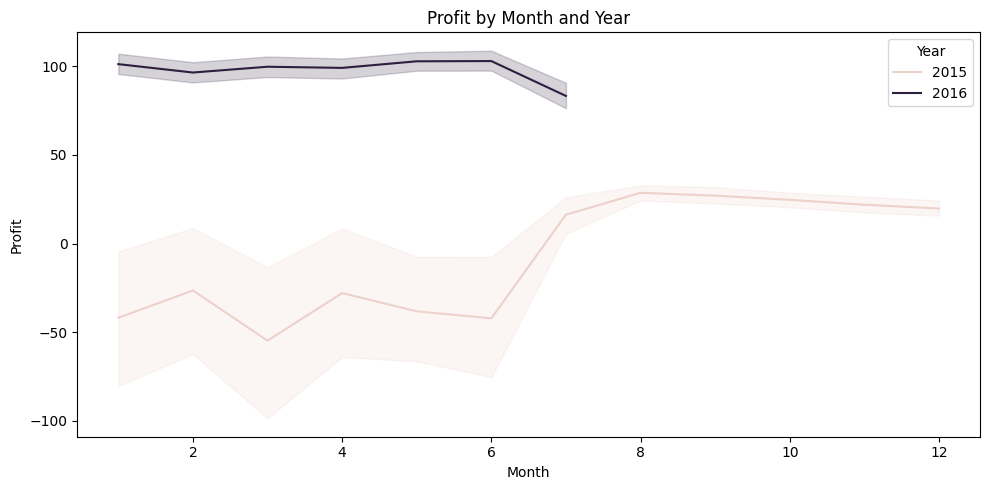

In [28]:
# define fig size
plt.figure(figsize=(10,5))
# Visualise Profit by Month and Year using lineplot (x, y, data, hue)
sns.lineplot(x='Month', y='Profit', hue='Year', data=df).set_title('Profit by Month and Year')
# Display the plot
plt.tight_layout()
plt.show()

In [29]:
# represent values in df in a pivot table (value, data, index, columns, aggfunc)
df.pivot_table(values='Profit', index='Year', columns='Month', aggfunc='sum')

Month,1,2,3,4,5,6,7,8,9,10,11,12
Year,,,,,,,,,,,,
2015,-5778.70,-4079.65,-8163.79,-4945.69,-7801.45,-8690.61,15104.47,65926.24,62172.33,62950.66,54480.9,67448.12
2016,280204.25,263640.18,299777.67,307746.51,356915.59,357549.86,107151.79,NaN,NaN,NaN,NaN,NaN


In [30]:
# Pivot table for Customer Gender, Age Group and Profit pivot_table(values, index[rows], columns)
df.pivot_table(values='Profit', index='Customer_Gender', columns='Age_Group', aggfunc='sum')

Age_Group,17 - 31 Young Adults,32 - 45 Adults,46 - 59 Old Adults,>59 Elders
Customer_Gender,,,,
F,379079.51,463957.36,204803.20,32419.15
M,429616.28,523779.14,198153.09,29800.95


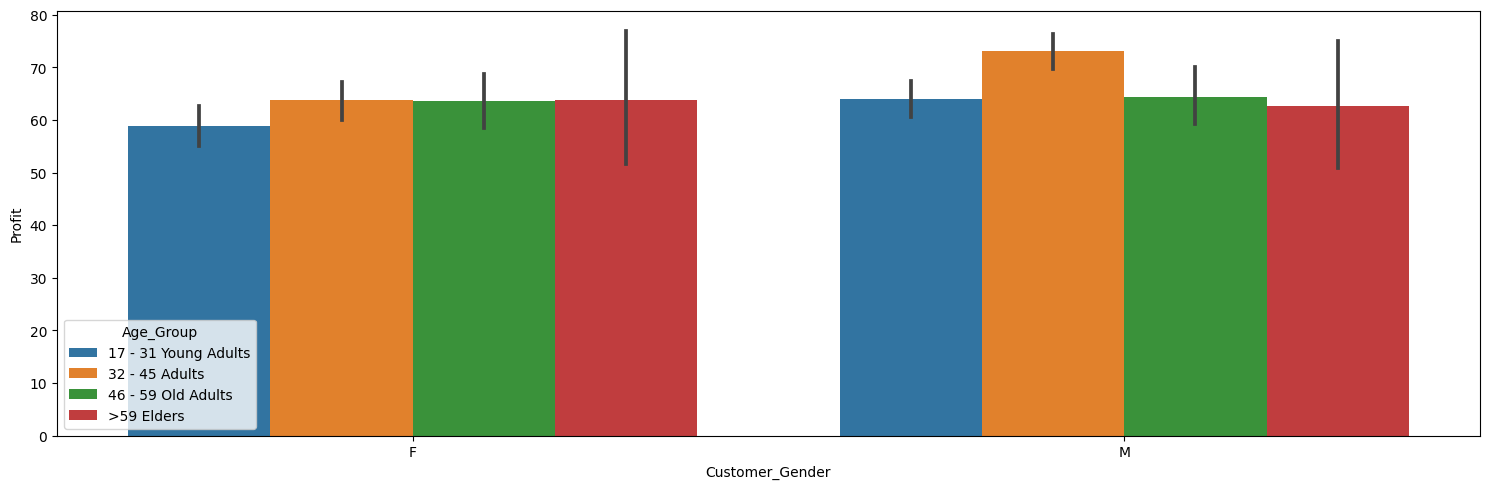

In [31]:
# Visualise Customer Gender, Age Group and Profit using barplot (x, y, data, hue)
plt.figure(figsize=(15,5))
# define plot
sns.barplot(x='Customer_Gender', y='Profit', hue='Age_Group', data=df)
# Display the plot
plt.tight_layout()
plt.show()

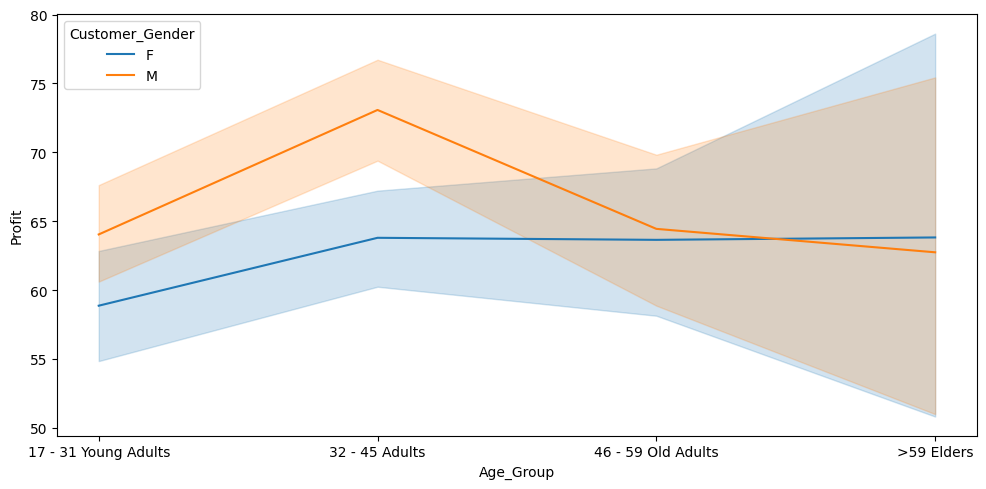

In [32]:
# Visualise Customer Gender, Age Group and Profit using lineplot (x, y, data, hue)
plt.figure(figsize=(10,5))
sns.lineplot(x='Age_Group', y='Profit', hue='Customer_Gender', data=df);
plt.tight_layout()
plt.show()

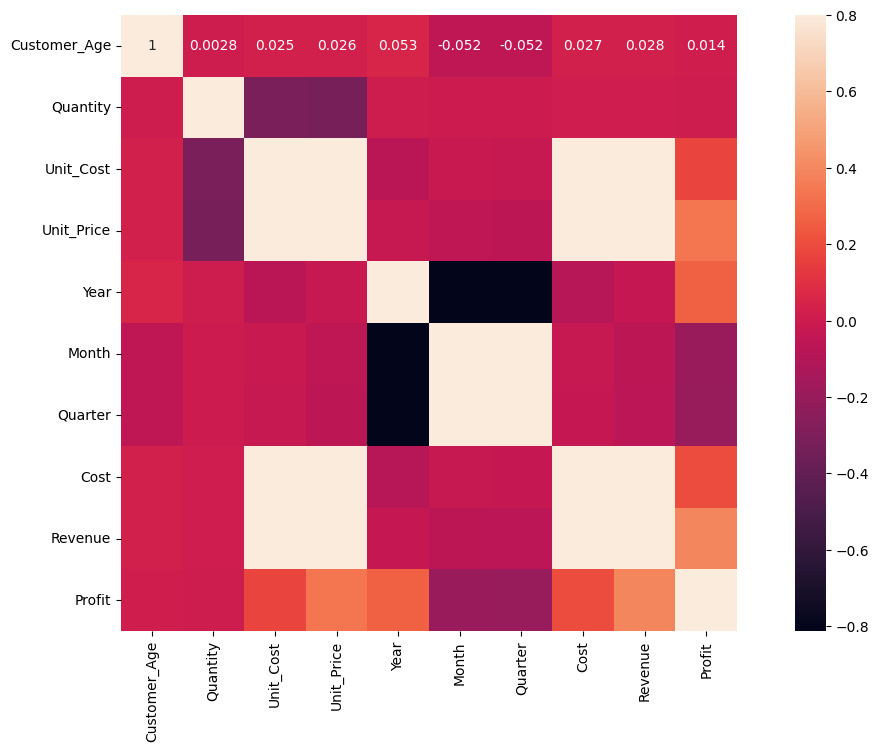

In [34]:
# correlation
df_corr = df.corr(numeric_only=True)

f, ax = plt.subplots(figsize=(15, 8))
sns.heatmap(data=df_corr, vmax=0.8, square=True, annot=True);

In [185]:
pip install seaborn --upgrade

python(65232) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Note: you may need to restart the kernel to use updated packages.


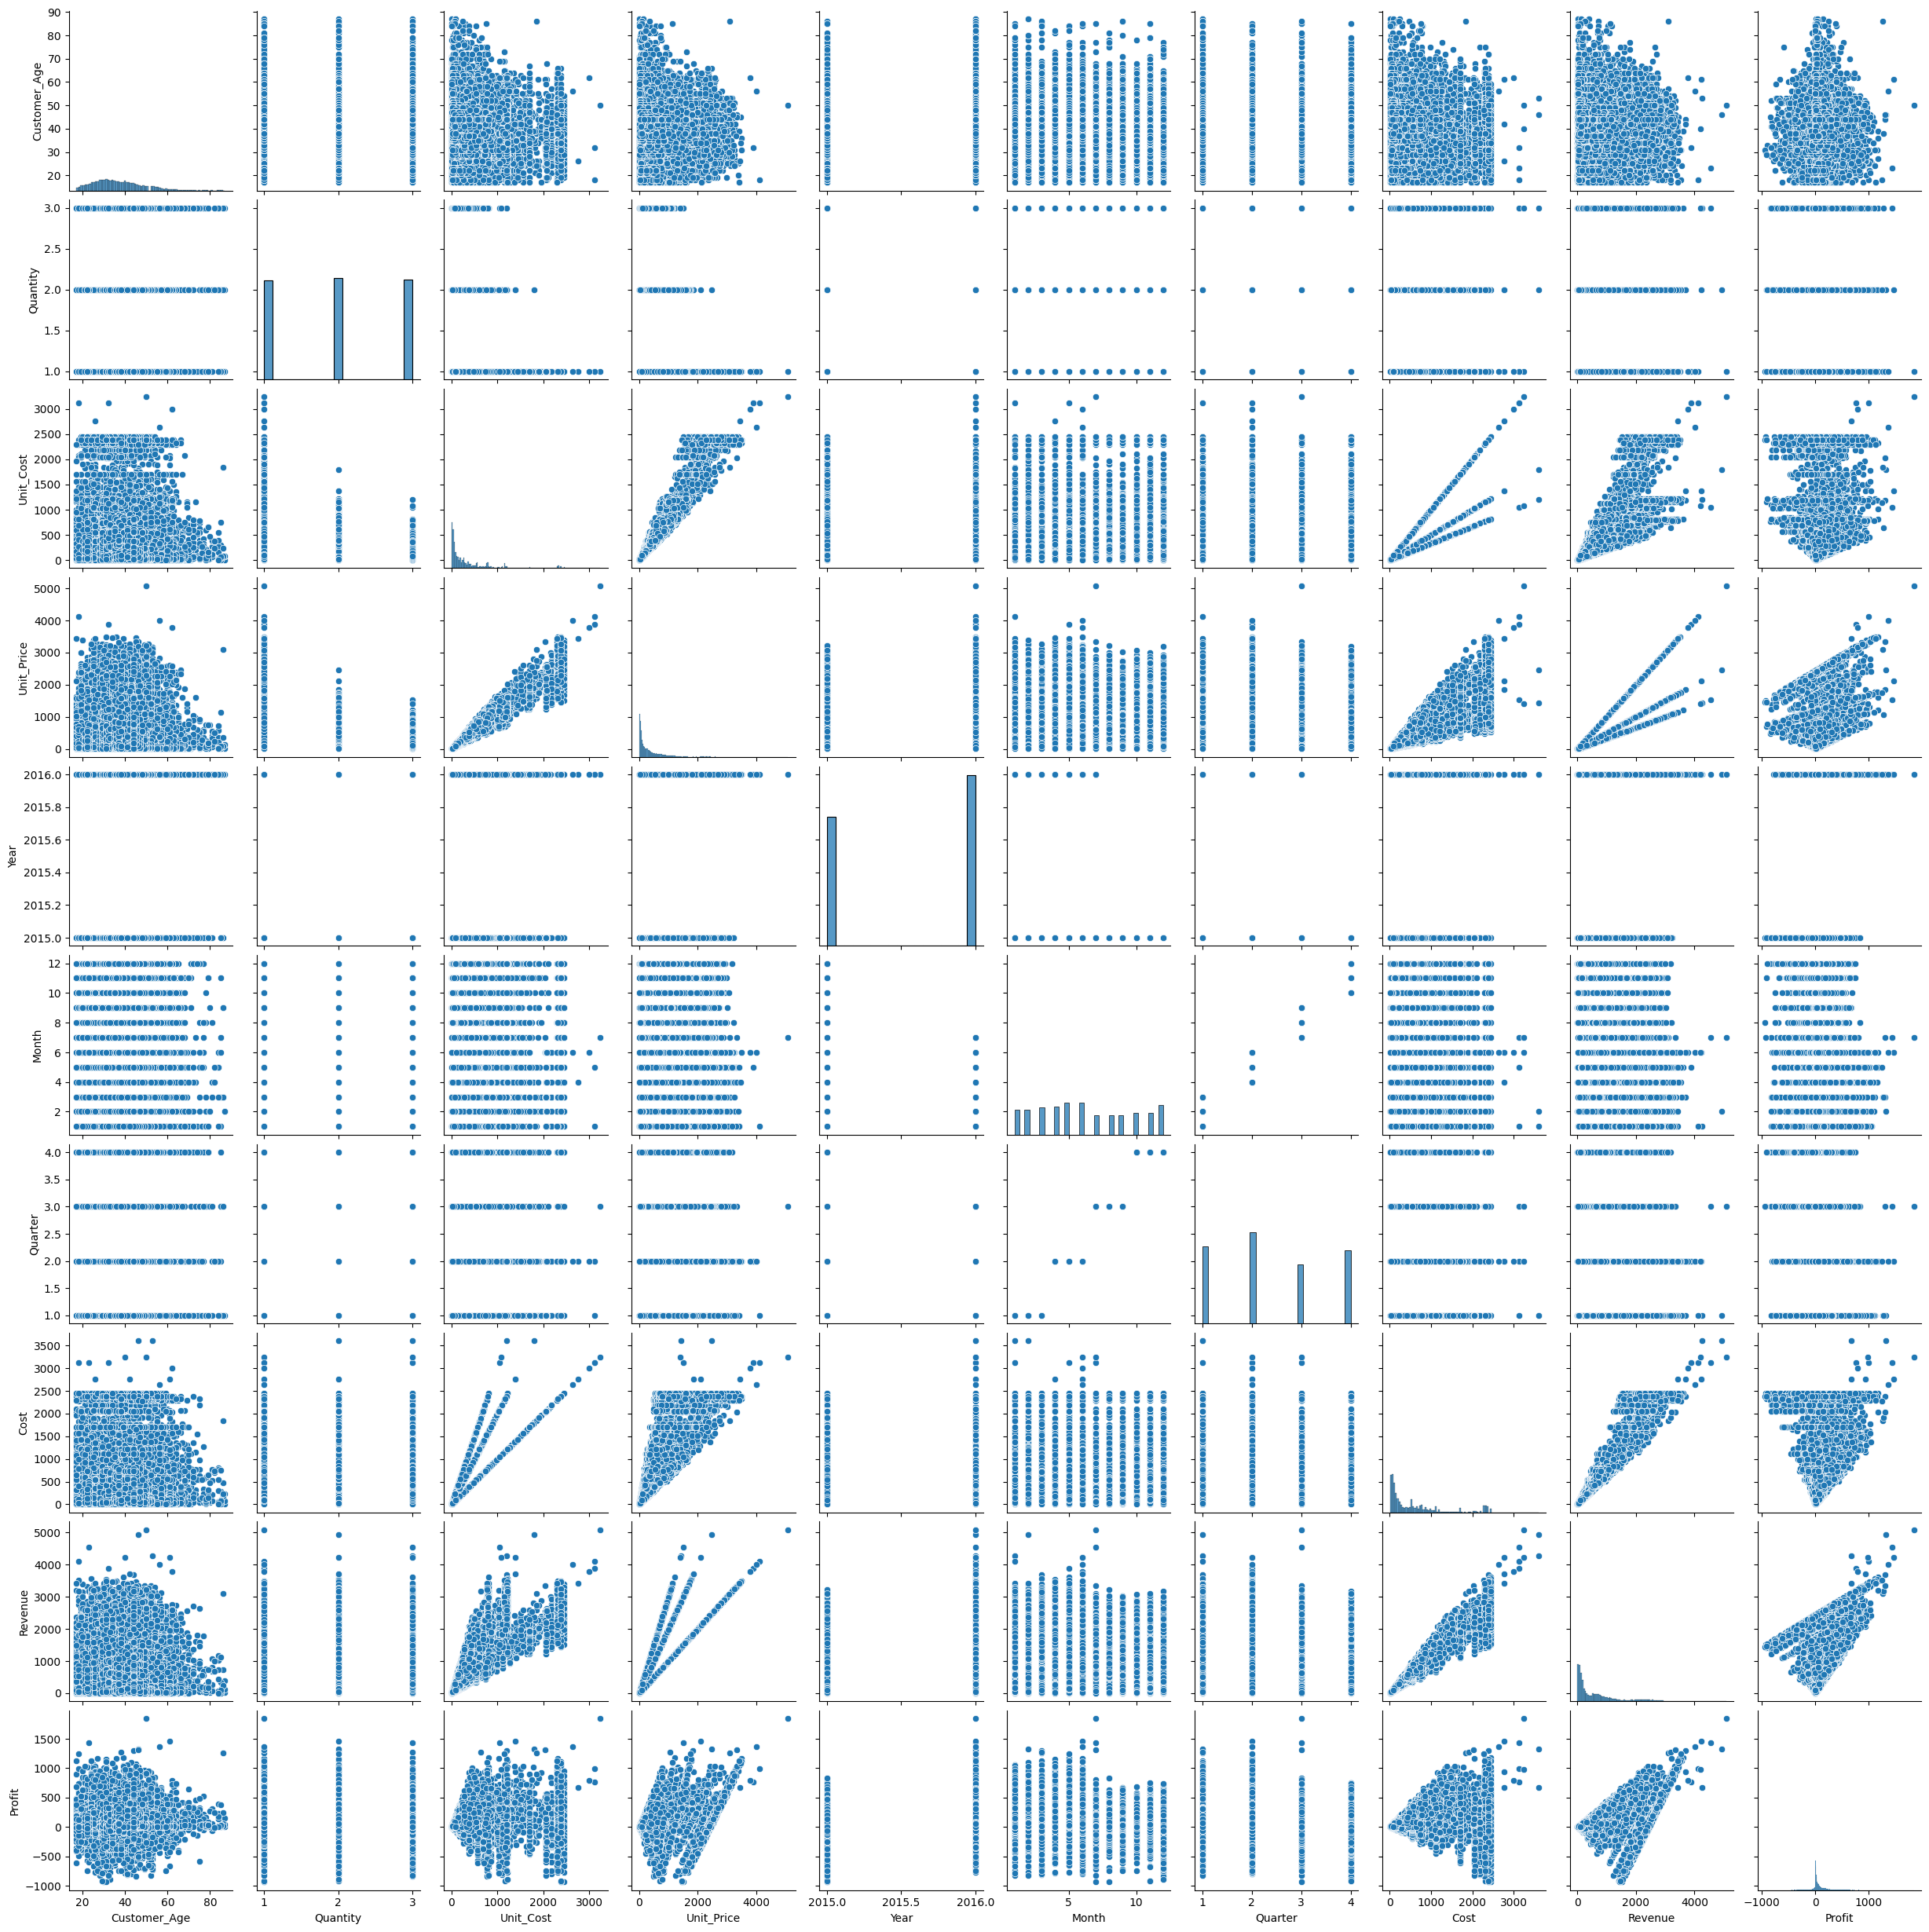

In [182]:
sns.pairplot(df, size=2.5)

#### Step 5: Insights and Conclusions

### Insights and Conclusions from the EDA on Dune Sales Dataset

#### Insights

1. **Missing Data**:
   - The dataset initially contained some missing values. After dropping rows with missing data, the dataset was cleaned and had no missing values.

2. **Datetime Analysis**:
   - The dataset includes a date column, which was converted to a datetime object, allowing for the extraction of the year, month, month name, and quarter. This enables temporal analysis.

3. **Customer Age Grouping**:
   - Customers were categorized into different age groups: Young Adults (17-31), Adults (32-45), Old Adults (46-59), and Elders (60+). This categorization helps in understanding the demographic distribution.

4. **Summary Statistics**:
   - The average age of customers is 36 years.
   - The average quantity of items purchased per transaction is 2.
   - There is significant variability in unit costs and prices, with averages of N349.88 for unit cost and N389.23 for unit price, and large standard deviations indicating high price diversity.

5. **Categorical Features**:
   - The dataset includes 4 customer types, 7 salespersons, 36 states, 3 product categories, 17 sub-product categories, and 3 payment options.
   - The most frequent customer type is 'low', and the gender distribution is predominantly female.
   - The salesperson with the most sales is Remota.
   - Lagos has the most frequent sales transactions among the 36 states.
   - Accessories and keyboards are the most frequently sold products and sub-products.
   - Cash is the most frequently used payment option.

#### Conclusions

The EDA on the Dune Sales dataset provided several key insights:

1. **Data Quality**:
   - The initial dataset had missing values, which were successfully handled, resulting in a clean dataset for further analysis.

2. **Temporal Patterns**:
   - Extracting temporal features from the date column allows for the analysis of trends and patterns over different periods.

3. **Demographic Analysis**:
   - Categorising customers by age groups helps in understanding the demographic trends and targeting specific age groups for marketing and sales strategies.

4. **Product and Sales Insights**:
   - Identifying the most frequent products, sub-products, and best-performing salesperson provides valuable insights into inventory management and sales strategies.
   - The high unit cost and price variability suggest diverse product offerings catering to different market segments.

5. **Geographical Distribution**:
   - Understanding the geographical distribution of sales, with Lagos being the most frequent, can help in regional marketing efforts and optimizing supply chain logistics.

6. **Payment Methods**:
   - The predominance of cash payments indicates customer preference, which can influence decisions on payment method offerings and improvements.

The EDA revealed important insights into customer demographics, sales patterns, and product performance, providing a solid foundation for data-driven decision-making and strategic planning.

---

### Ikemefula Solomon ORIAKU
**Location:** London, UK  
**Phone:** (+44) 07932 773167  
**Email:** [sioriaku@gmail.com](mailto:sioriaku@gmail.com)  
**GitHub:** [github.com/gentleiyke](https://github.com/gentleiyke)  
**LinkedIn:** [linkedin.com/in/gentleiyke](https://www.linkedin.com/in/gentleiyke)
